In [11]:

import numpy as np
import math
import matplotlib.pyplot as plt
from MultHelpers import *


In [12]:
def y1(x):
    return x**2 + 567*x + 1000
def y2(x):
    return x**2 - 567*x + 1000
def y3(x):
    return x**2

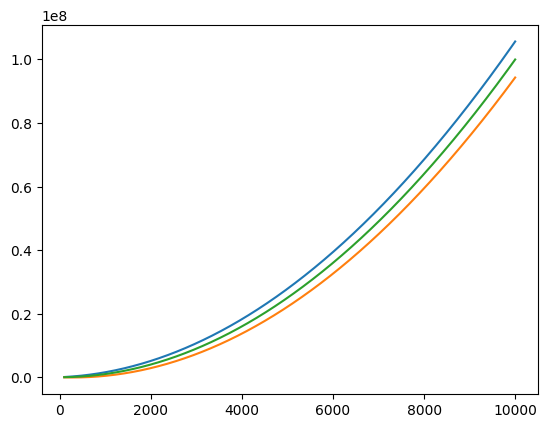

In [13]:
X = np.arange(100, 10000)

plt.plot(X, [y1(x) for x in X])
plt.plot(X, [y2(x) for x in X])
plt.plot(X, [y3(x) for x in X])

In [4]:
def gradeSchoolMult( X, Y ): # X e Y são os inteiros
    x = getDigits(X)
    y = getDigits(Y)
    summands = []
    for xDigit in range(len(x)):        #para cada posição de dígito em X
        currentXDigit = x[len(x) - xDigit-1]
        z = [0 for i in range(xDigit)]  #z serve para conter os dígitos de 'xDigit times y'; inicializa com zeros
        carry = 0
        for yDigit in range(len(y)):    #para cada posição de dígito em Y
            newProd = getDigits( currentXDigit * y[len(y) - yDigit-1] + carry )
            z.insert( 0, newProd[-1] ) # colocar o próximo dígito das unidades no produto (à direita no z)
            if len(newProd) > 1:       # "e-vai-um"
                carry = newProd[0]
            else:
                carry = 0
        z.insert(0, carry)            # caso haja "e-vai-um", deve ser colocado como digíto mais à esquerda
        summands.append(makeInt(z))
    return sum(summands) # Terminar somando todas as parcelas do produto

def divideAndConquerMult1( X, Y ):
    return divideAndConquerMult1_helper( getDigits(X), getDigits(Y) )
def divideAndConquerMult1_helper( x, y ):

    n = max( len(x), len(y) )
    # preenche o inteiro com menor no. de dígitos colocando (enchendo com) zeros à esquerda até atingir o mesmo tamanho
    while len(x) < n:
        x.insert(0,0)
    while len(y) < n:
        y.insert(0,0)

    if n == 1:
        return x[0]*y[0] # caso base -> nos requisitos podemos multiplicar diretamente inteiros com um único dígito

    # se n > 1:
    mid = round(n/2)
    xhigh = x[:mid]     # ou seja, [ x[0], x[1], ..., x[mid-1] ]
    xlow = x[mid:]      # ou [ x[mid], ..., x[n-1] ]
    yhigh = y[:mid]
    ylow = y[mid:]

    highhigh = divideAndConquerMult1_helper( xhigh , yhigh )
    highlow = divideAndConquerMult1_helper( xhigh , ylow )
    lowhigh = divideAndConquerMult1_helper( xlow , yhigh )
    lowlow = divideAndConquerMult1_helper( xlow , ylow )

    # agora fazemos uns shifts para acomodar cada uma das 4 partes e poder somá-las (ver slides para a explicação)
    HH = getDigits(highhigh) + [ 0 for i in range(2*(n - mid))]
    MID = getDigits(lowhigh + highlow) + [0 for i in range(n-mid)]
    LL = getDigits(lowlow)
    result = makeInt(HH) + makeInt(MID) + makeInt(LL)

    return result

def karatsuba( X, Y ):
    return karatsuba_helper( getDigits(X), getDigits(Y))
def karatsuba_helper( x, y ):
    n = max( len(x), len(y) )
    # encher o menor com zeros até que ambos tenham a mesma quantidade de dígitos
    while len(x) < n:
        x.insert(0,0)
    while len(y) < n:
        y.insert(0,0)
    if n == 1:
        return x[0]*y[0] # caso base - nos requisitos podemos multiplicar inteiros com um único dígito
    mid = round(n/2)
    xhigh = x[:mid] # [ x[0], x[1], ..., x[mid-1] ]
    xlow = x[mid:] # [ x[mid], ..., x[n-1] ]
    yhigh = y[:mid]
    ylow = y[mid:]
    highhigh = karatsuba_helper( xhigh , yhigh )
    lowlow = karatsuba_helper( xlow , ylow )
    tmpTerm = karatsuba_helper( getDigits( makeInt(xlow) + makeInt(xhigh) ) , getDigits( makeInt(ylow) + makeInt(yhigh) ) )
    middleTerm = tmpTerm - highhigh - lowlow # igual a highlow + lowhigh na função anterior divideAndConquerMult1
    HH = getDigits(highhigh) + [ 0 for i in range(2*(n - mid))]
    MID = getDigits(middleTerm) + [0 for i in range(n-mid)]
    LL = getDigits(lowlow)
    result = makeInt(HH) + makeInt(MID) + makeInt(LL)
    return result

In [5]:
plt.clf()
nVals = range(10000)
nGrd, tGrd = multABunch(gradeSchoolMult, nVals, 5)
nDiv, tDiv = multABunch(gradeSchoolMult, nVals, 5)
nKar, tKar = multABunch(gradeSchoolMult, nVals, 5)
plt.plot(nGrd, tGrd)
plt.plot(nDiv, tDiv)
plt.plot(nKar, tKar)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [56]:
def fiboR(n):
    if n<=1:
        return n
    else:
        return fiboR(n-2) + fiboR(n-1)

def fiboP(n):
    a=0
    b=1
    if n<=1:
        return n
    for i in range(n-1):
        res = a+b
        a=b
        b=res
    return res


def fiboF(n):
    return int(( (1/math.sqrt(5))*(((1+math.sqrt(5))/2)**n) ) - ( (1/math.sqrt(5))*(((1-math.sqrt(5))/2)**n) ))



In [26]:
print(fiboR(10))
print(fiboP(10))
print(fiboF(10))

55
55
55


In [41]:
def multABunch2(myFn, nVals, numTrials):
    nValues = []
    tValues = []
    for n in nVals:
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            start = time.time()                # notice that we only start timing just before executing myFn()
            myFn( n )
            end = time.time()                # and we stop the clock as soon as the execution of myFn() stops
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

1


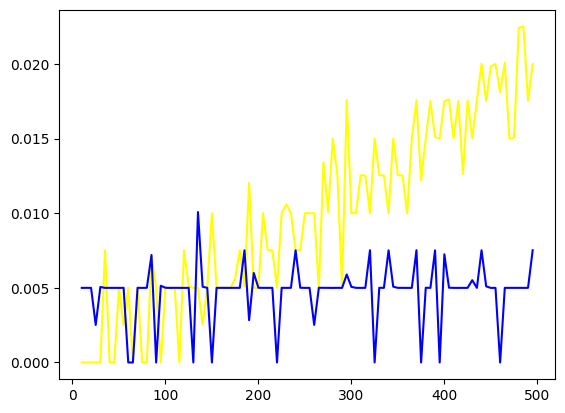

In [55]:
plt.clf()
nVals = np.arange(10,500,5)
nR, tR = multABunch2(fiboR, nVals, 5)
nP, tP = multABunch2(fiboP, nVals , 5)
nF, tF = multABunch2(fiboF, nVals, 5)

plt.plot(nR, tR)
plt.plot(nP, tP, color="yellow", label="DP")
plt.plot(nF, tF, color="blue", label="Function")